# DengAI - Predicting Disease Spread

# Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation

The project is focus solely on prediction of dengue cases.

# Brief description of the data set and a summary of its attributes

The data for this competition comes from multiple sources aimed at supporting the Predict the Next Pandemic Initiative. Dengue surveillance data is provided by the U.S. Centers for Disease Control and prevention, as well as the Department of Defense's Naval Medical Research Unit 6 and the Armed Forces Health Surveillance Center, in collaboration with the Peruvian government and U.S. universities. Environmental and climate data is provided by the National Oceanic and Atmospheric Administration (NOAA), an agency of the U.S. Department of Commerce.

# Problem description

Your goal is to predict the total_cases label for (San Juan, year, weekofyear) in the test set. There is this city, San Juan, with test data for it spanning 5 and 3 years respectively. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

# The features in this dataset

You are provided the following set of information on a (year, weekofyear) timescale:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|city |	City abbreviations: sj for San Juan|
|week_start_date|	Date given in yyyy-mm-dd format|
|station_max_temp_c|	Maximum temperature|
|station_min_temp_c|	Minimum temperature|
|station_avg_temp_c|	Average temperature|
|station_precip_mm|	Total precipitation|
|station_diur_temp_rng_c|	Diurnal temperature range|
|precipitation_amt_mm|	Total precipitation|
|reanalysis_sat_precip_amt_mm|	Total precipitation|
|reanalysis_dew_point_temp_k|	Mean dew point temperature|
|reanalysis_air_temp_k|	Mean air temperature|
|reanalysis_relative_humidity_percent|	Mean relative humidity|
|reanalysis_specific_humidity_g_per_kg|	Mean specific humidity|
|reanalysis_precip_amt_kg_per_m2|	 Total precipitation|
|reanalysis_max_air_temp_k|	Maximum air temperature|
|reanalysis_min_air_temp_k|	Minimum air temperature|
|reanalysis_avg_temp_k|	Average air temperature|
|reanalysis_tdtr_k|	Diurnal temperature range|
|ndvi_se|	Pixel southeast of city centroid|
|ndvi_sw|	Pixel southwest of city centroid|
|ndvi_ne|	Pixel northeast of city centroid|
|ndvi_nw|	Pixel northwest of city centroid|

# Brief summary of data exploration and actions taken for data cleaning and feature engineering

Data Exploration includes data summary, statistics, relevant graphs to find any relationships within.

As for data cleaning, we will check for missing values and decide what imputation method. We also check for data duplicates and outliers. Finally perform binary encoding before model training.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')
from pycaret.regression import *

np.random.seed(123)

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

In [2]:
df = pd.read_csv("dengue_features_train.csv")

In [3]:
df

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0     sj  1990          18       30/4/1990  0.122600  0.103725  0.198483   
1     sj  1990          19        7/5/1990  0.169900  0.142175  0.162357   
2     sj  1990          20       14/5/1990  0.032250  0.172967  0.157200   
3     sj  1990          21       21/5/1990  0.128633  0.245067  0.227557   
4     sj  1990          22       28/5/1990  0.196200  0.262200  0.251200   
..   ...   ...         ...             ...       ...       ...       ...   
931   sj  2008          13       25/3/2008  0.077850 -0.039900  0.310471   
932   sj  2008          14        1/4/2008 -0.038000 -0.016833  0.119371   
933   sj  2008          15        8/4/2008 -0.155200 -0.052750  0.137757   
934   sj  2008          16       15/4/2008  0.001800       NaN  0.203900   
935   sj  2008          17       22/4/2008 -0.037000 -0.010367  0.077314   

      ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0    0.177617                 12.42             297.572857   
1    0.155486                 22.82             298.211429   
2    0.170843                 34.54             298.781429   
3    0.235886                 15.36             298.987143   
4    0.247340                  7.52             299.518571   
..        ...                   ...                    ...   
931  0.296243                 27.19             296.958571   
932  0.066386                  3.82             298.081429   
933  0.141214                 16.96             297.460000   
934  0.209843                  0.00             297.630000   
935  0.090586                  0.00             298.672857   

     reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0               297.742857                   292.414286   
1               298.442857                   293.951429   
2               298.878571                   295.434286   
3               299.228571                   295.310000   
4               299.664286                   295.821429   
..                     ...                          ...   
931             296.957143                   292.095714   
932             298.228571                   293.235714   
933             297.564286                   292.732857   
934             297.778571                   292.274286   
935             298.692857                   294.280000   

     reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                        299.8                      295.9   
1                        300.9                      296.4   
2                        300.5                      297.3   
3                        301.4                      297.0   
4                        301.9                      297.5   
..                         ...                        ...   
931                      299.7                      294.4   
932                      299.8                      296.5   
933                      299.4                      295.8   
934                      299.7                      295.9   
935                      300.9                      295.9   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              32.00                             73.365714   
1                              17.94                             77.368571   
2                              26.10                             82.052857   
3                              13.90                             80.337143   
4                              12.20                             80.460000   
..                               ...                                   ...   
931                             7.55                             74.247143   
932                             3.67                             74.600000   
933                            35.00                             75.027143   
934                             4.82                             72.285714   
935                             2.17          

Dataset has 2 categorical features and 23 numeric features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanal

Summary of statistics below:

In [5]:
df.describe(include='all').T

count unique        top freq       mean  \
city                                    936      1         sj  936        NaN   
year                                    936    NaN        NaN  NaN    1998.83   
weekofyear                              936    NaN        NaN  NaN    26.5032   
week_start_date                         936    936  24/9/1994    1        NaN   
ndvi_ne                                 745    NaN        NaN  NaN  0.0579247   
ndvi_nw                                 887    NaN        NaN  NaN  0.0674691   
ndvi_se                                 917    NaN        NaN  NaN   0.177655   
ndvi_sw                                 917    NaN        NaN  NaN   0.165956   
precipitation_amt_mm                    927    NaN        NaN  NaN    35.4708   
reanalysis_air_temp_k                   930    NaN        NaN  NaN    299.164   
reanalysis_avg_temp_k                   930    NaN        NaN  NaN    299.277   
reanalysis_dew_point_temp_k             930    NaN        NaN  NaN     295.11   
reanalysis_max_air_temp_k               930    NaN        NaN  NaN    301.399   
reanalysis_min_air_temp_k               930    NaN        NaN  NaN    297.302   
reanalysis_precip_amt_kg_per_m2         930    NaN        NaN  NaN    30.4654   
reanalysis_relative_humidity_percent    930    NaN        NaN  NaN    78.5682   
reanalysis_sat_precip_amt_mm            927    NaN        NaN  NaN    35.4708   
reanalysis_specific_humidity_g_per_kg   930    NaN        NaN  NaN    16.5524   
reanalysis_tdtr_k                       930    NaN        NaN  NaN    2.51627   
station_avg_temp_c                      930    NaN        NaN  NaN    27.0065   
station_diur_temp_rng_c                 930    NaN        NaN  NaN    6.75737   
station_max_temp_c                      930    NaN        NaN  NaN     31.608   
station_min_temp_c                      930    NaN        NaN  NaN    22.6006   
station_precip_mm                       930    NaN        NaN  NaN    26.7855   
total_cases                             936    NaN        NaN  NaN    34.1806   

                                             std        min       25%  \
city                                         NaN        NaN       NaN   
year                                     5.21208       1990      1994   
weekofyear                               15.0219          1     13.75   
week_start_date                              NaN        NaN       NaN   
ndvi_ne                                 0.107153   -0.40625    0.0045   
ndvi_nw                                0.0924788    -0.4561  0.016425   
ndvi_se                                0.0571663 -0.0155333  0.139283   
ndvi_sw                                0.0560733 -0.0634571  0.129157   
precipitation_amt_mm                     44.6061          0         0   
reanalysis_air_temp_k                    1.23643    295.939   298.195   
reanalysis_avg_temp_k                    1.21864    296.114     298.3   
reanalysis_dew_point_temp_k              1.56994    289.643   293.848   
reanalysis_max_air_temp_k                1.25893      297.8     300.4   
reanalysis_min_air_temp_k                1.29471      292.6     296.3   
reanalysis_precip_amt_kg_per_m2          35.6281          0    10.825   
reanalysis_relative_humidity_percent     3.38949    66.7357   76.2461   
reanalysis_sat_precip_amt_mm             44.6061          0         0   
reanalysis_specific_humidity_g_per_kg    1.56092    11.7157   15.2364   
reanalysis_tdtr_k                       0.498892    1.35714   2.15714   
station_avg_temp_c                       1.41547    22.8429   25.8429   
station_diur_temp_rng_c                 0.835993    4.52857       6.2   
station_max_temp_c                        1.7173       26.7      30.6   
station_min_temp_c                       1.50628       17.8      21.7   
station_precip_mm                        29.3258          0     6.825   
total_cases                              51.3814          0         9   

                                

Shape of dataset:

In [6]:
df.shape

(936, 25)

In [7]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

### Data Exploration

Dataset starts from 1990 to 2008

In [8]:
df['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

Weekofyear is mostly consistent figures except the last one

In [9]:
df['weekofyear'].value_counts()

27    18
26    18
24    18
23    18
22    18
21    18
20    18
19    18
18    18
17    18
16    18
15    18
14    18
13    18
12    18
11    18
10    18
9     18
8     18
7     18
6     18
5     18
4     18
3     18
2     18
25    18
1     18
40    18
51    18
49    18
48    18
47    18
46    18
45    18
44    18
43    18
42    18
41    18
28    18
39    18
38    18
37    18
36    18
35    18
34    18
33    18
32    18
31    18
30    18
29    18
50    18
52    15
53     3
Name: weekofyear, dtype: int64

### Data Visualization

The dataset is Normally distributed.

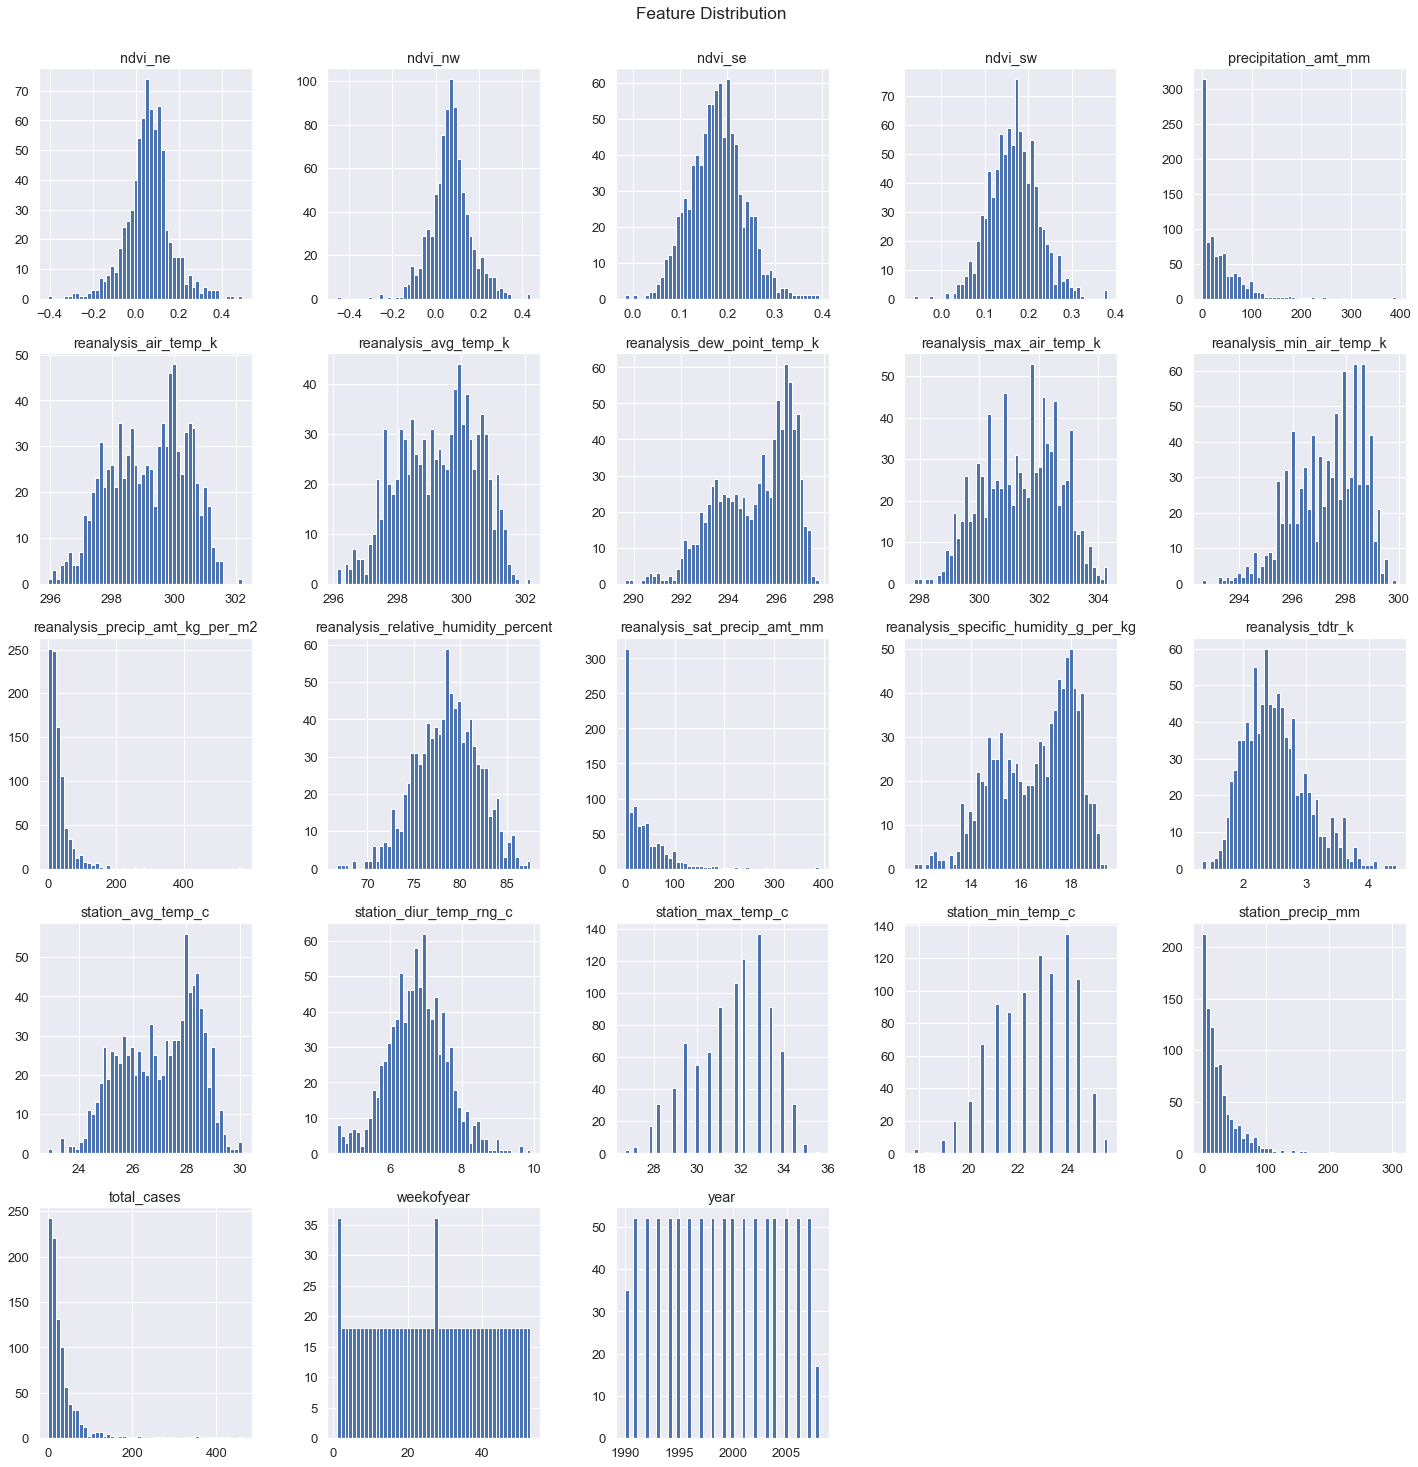

In [10]:
df.hist(bins=50, figsize=(20,20))

plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show();

Below are each visuals of the data:

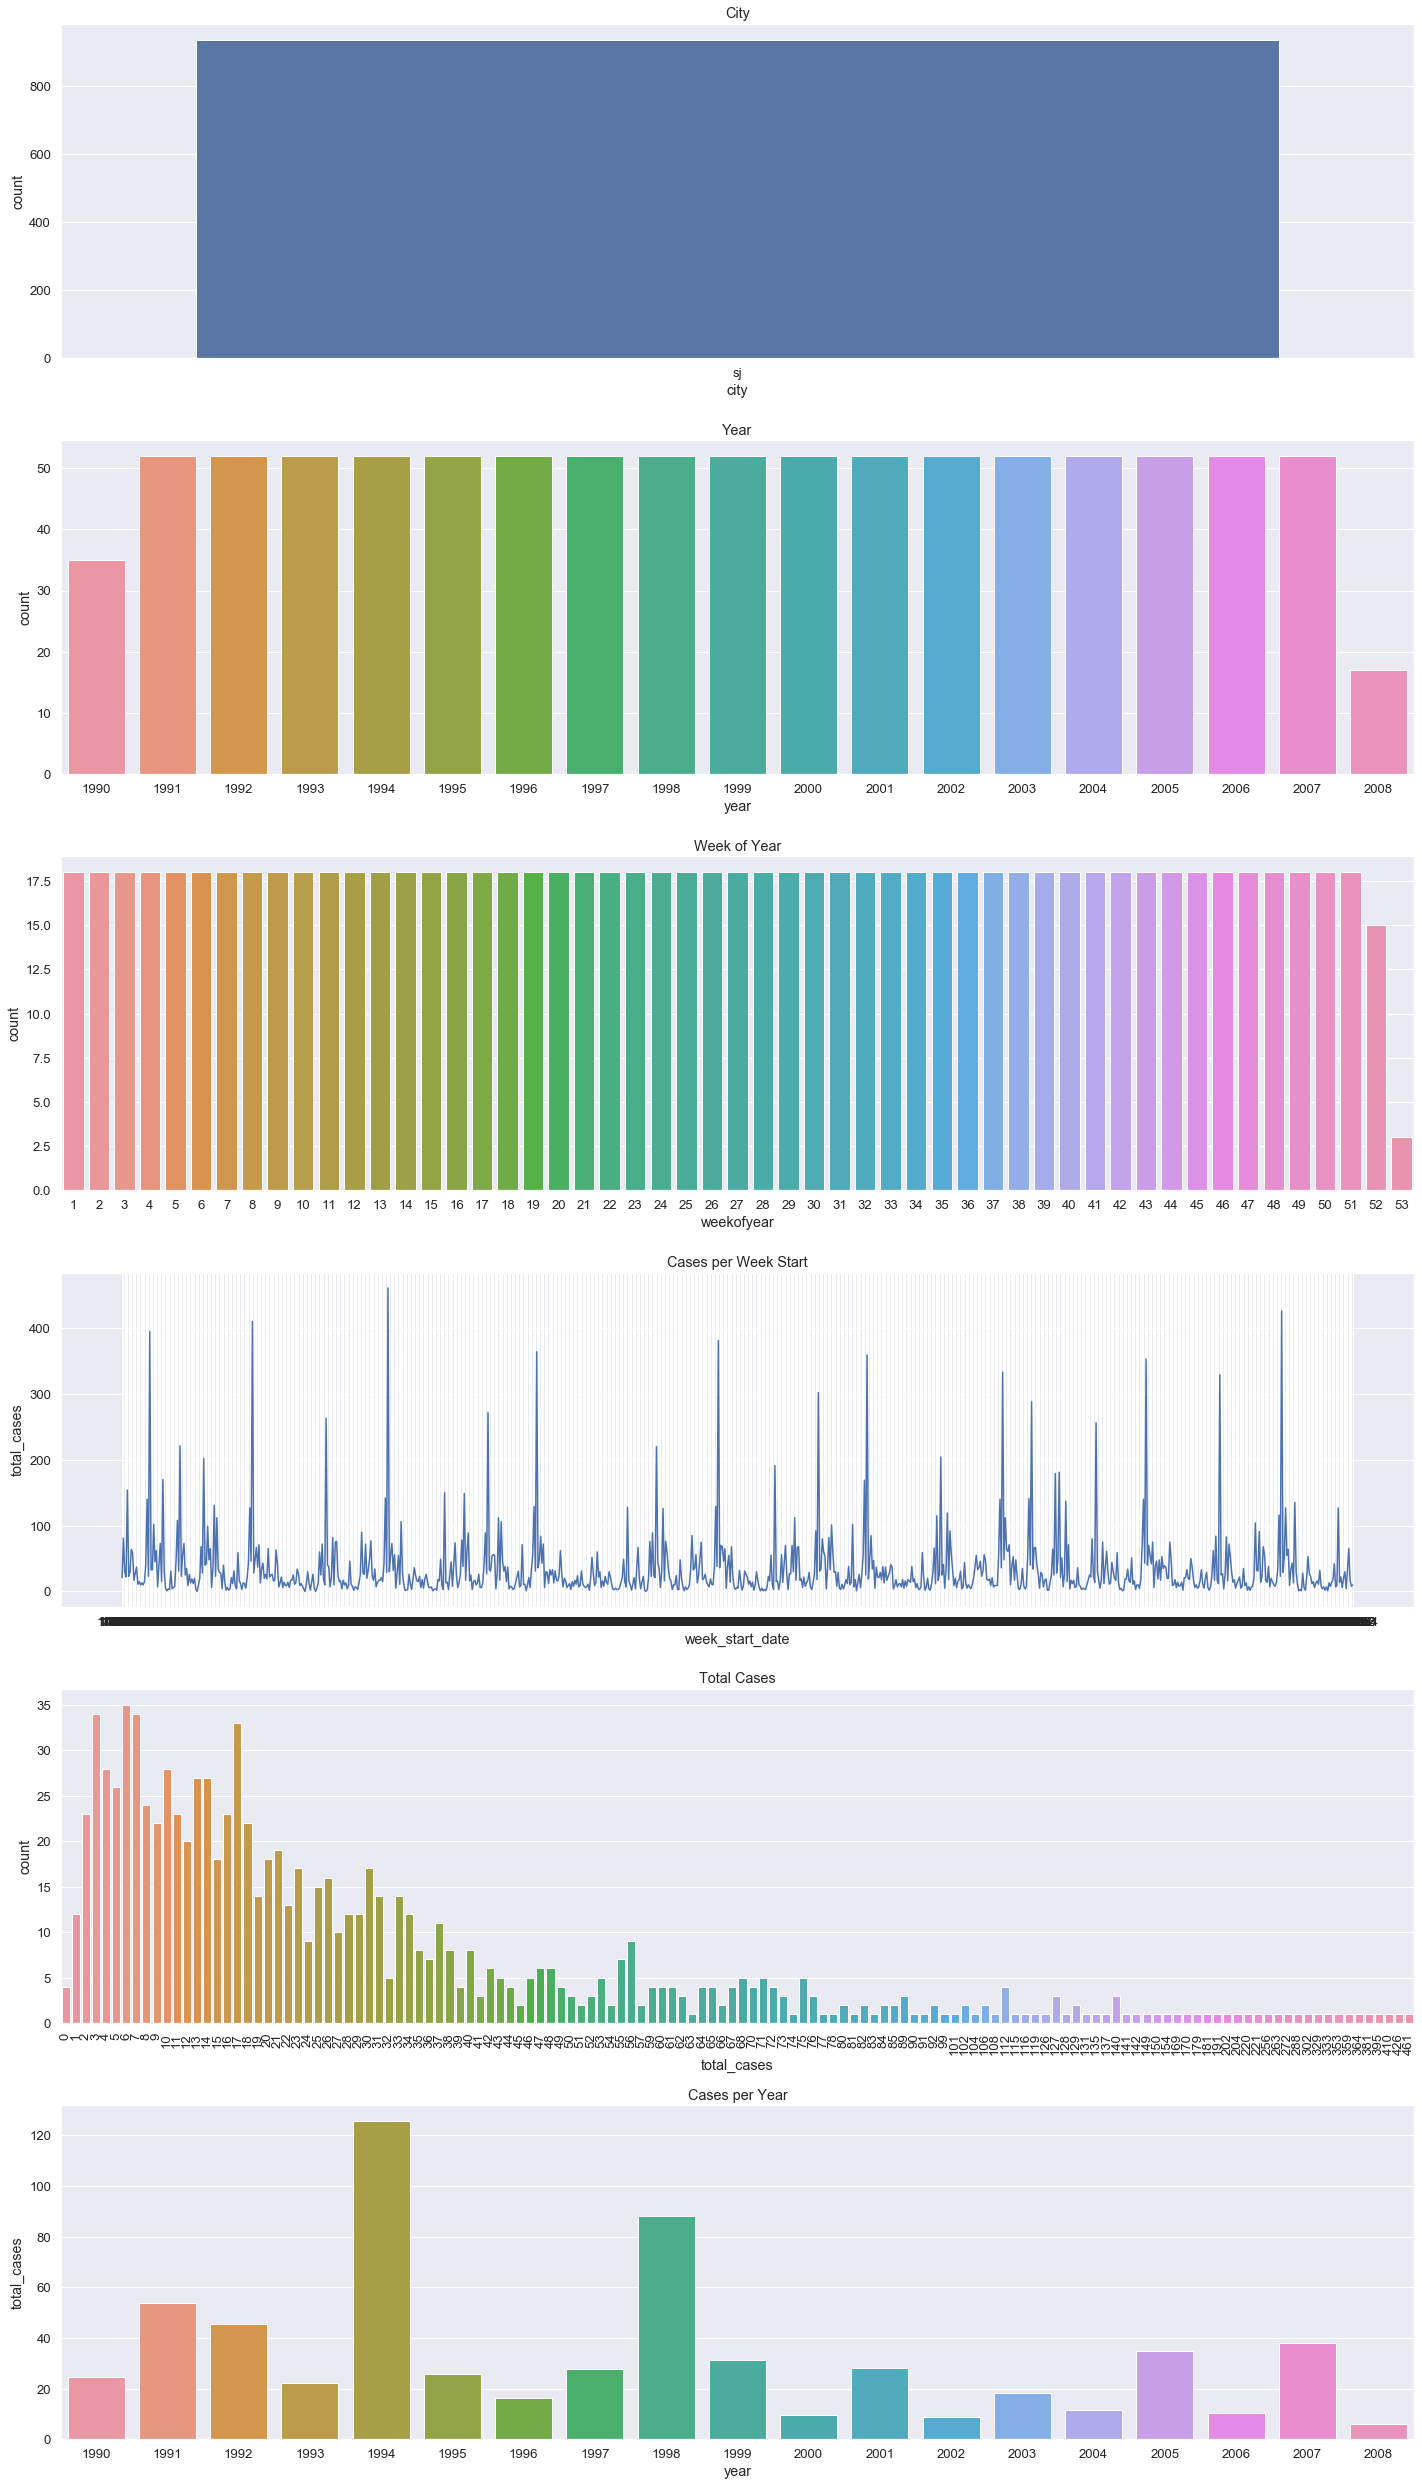

In [13]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.title("City")
sns.countplot(df.city)

plt.subplot(7,1,2)
plt.title("Year")
sns.countplot(df.year)

plt.subplot(7,1,3)
plt.title("Week of Year")
sns.countplot(df.weekofyear)

plt.subplot(7,1,4)
plt.title("Cases per Week Start")
sns.lineplot(x=df.week_start_date, y=df.total_cases)

plt.subplot(7,1,5)
plt.title("Total Cases")
plt.xticks(rotation=90)
sns.countplot(df.total_cases)

plt.subplot(7,1,6)
plt.title("Cases per Year")
sns.barplot(x=df.year,y=df.total_cases,data=df,ci=None)


plt.tight_layout()
plt.show()

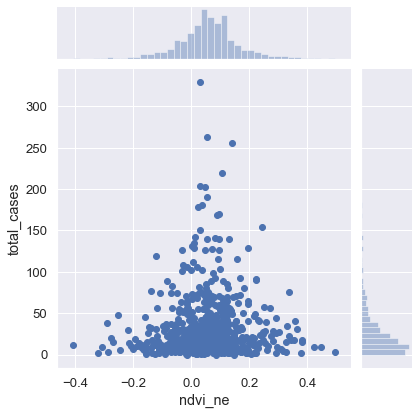

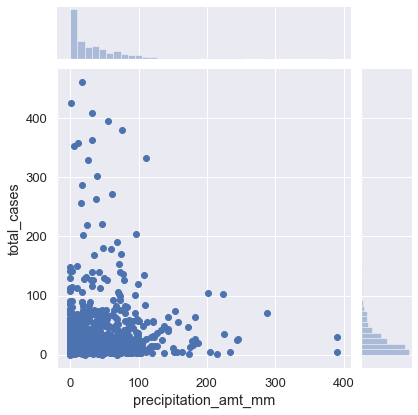

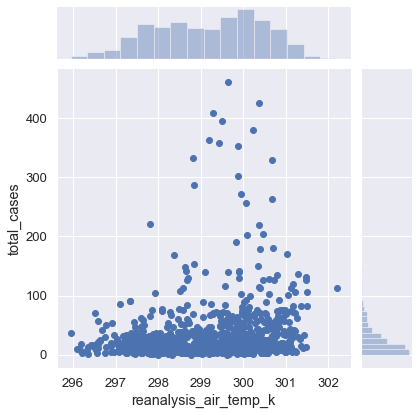

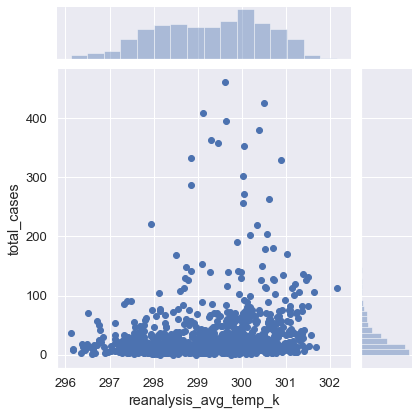

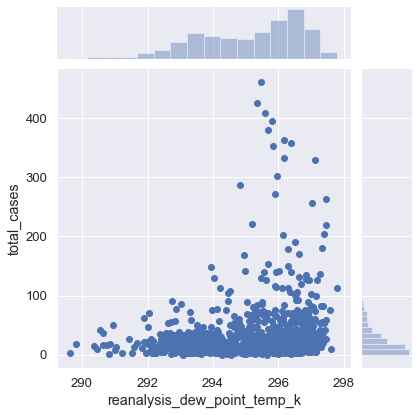

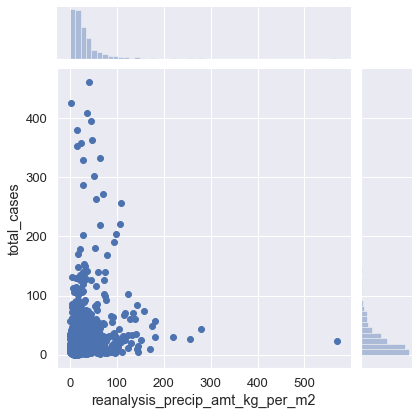

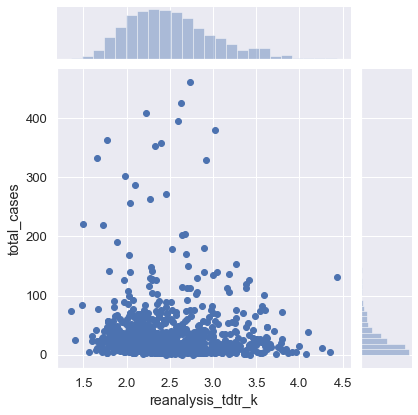

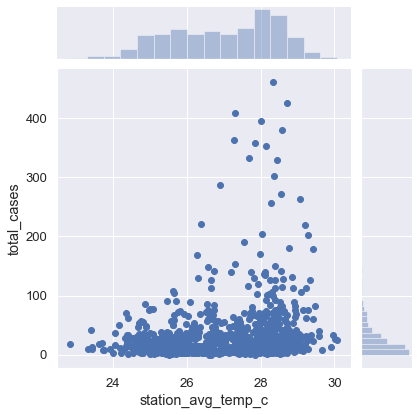

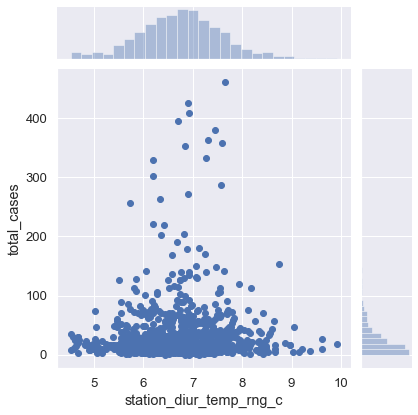

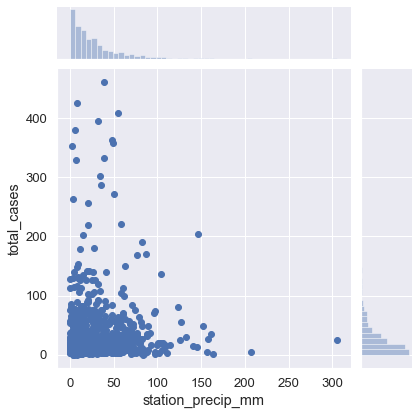

In [14]:
sns.jointplot(x='ndvi_ne', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='precipitation_amt_mm', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='reanalysis_air_temp_k', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='reanalysis_avg_temp_k', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='reanalysis_dew_point_temp_k', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='reanalysis_precip_amt_kg_per_m2', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='reanalysis_tdtr_k', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='station_avg_temp_c', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='station_diur_temp_rng_c', y='total_cases',data=df, kind='scatter')

sns.jointplot(x='station_precip_mm', y='total_cases',data=df, kind='scatter')


plt.show()

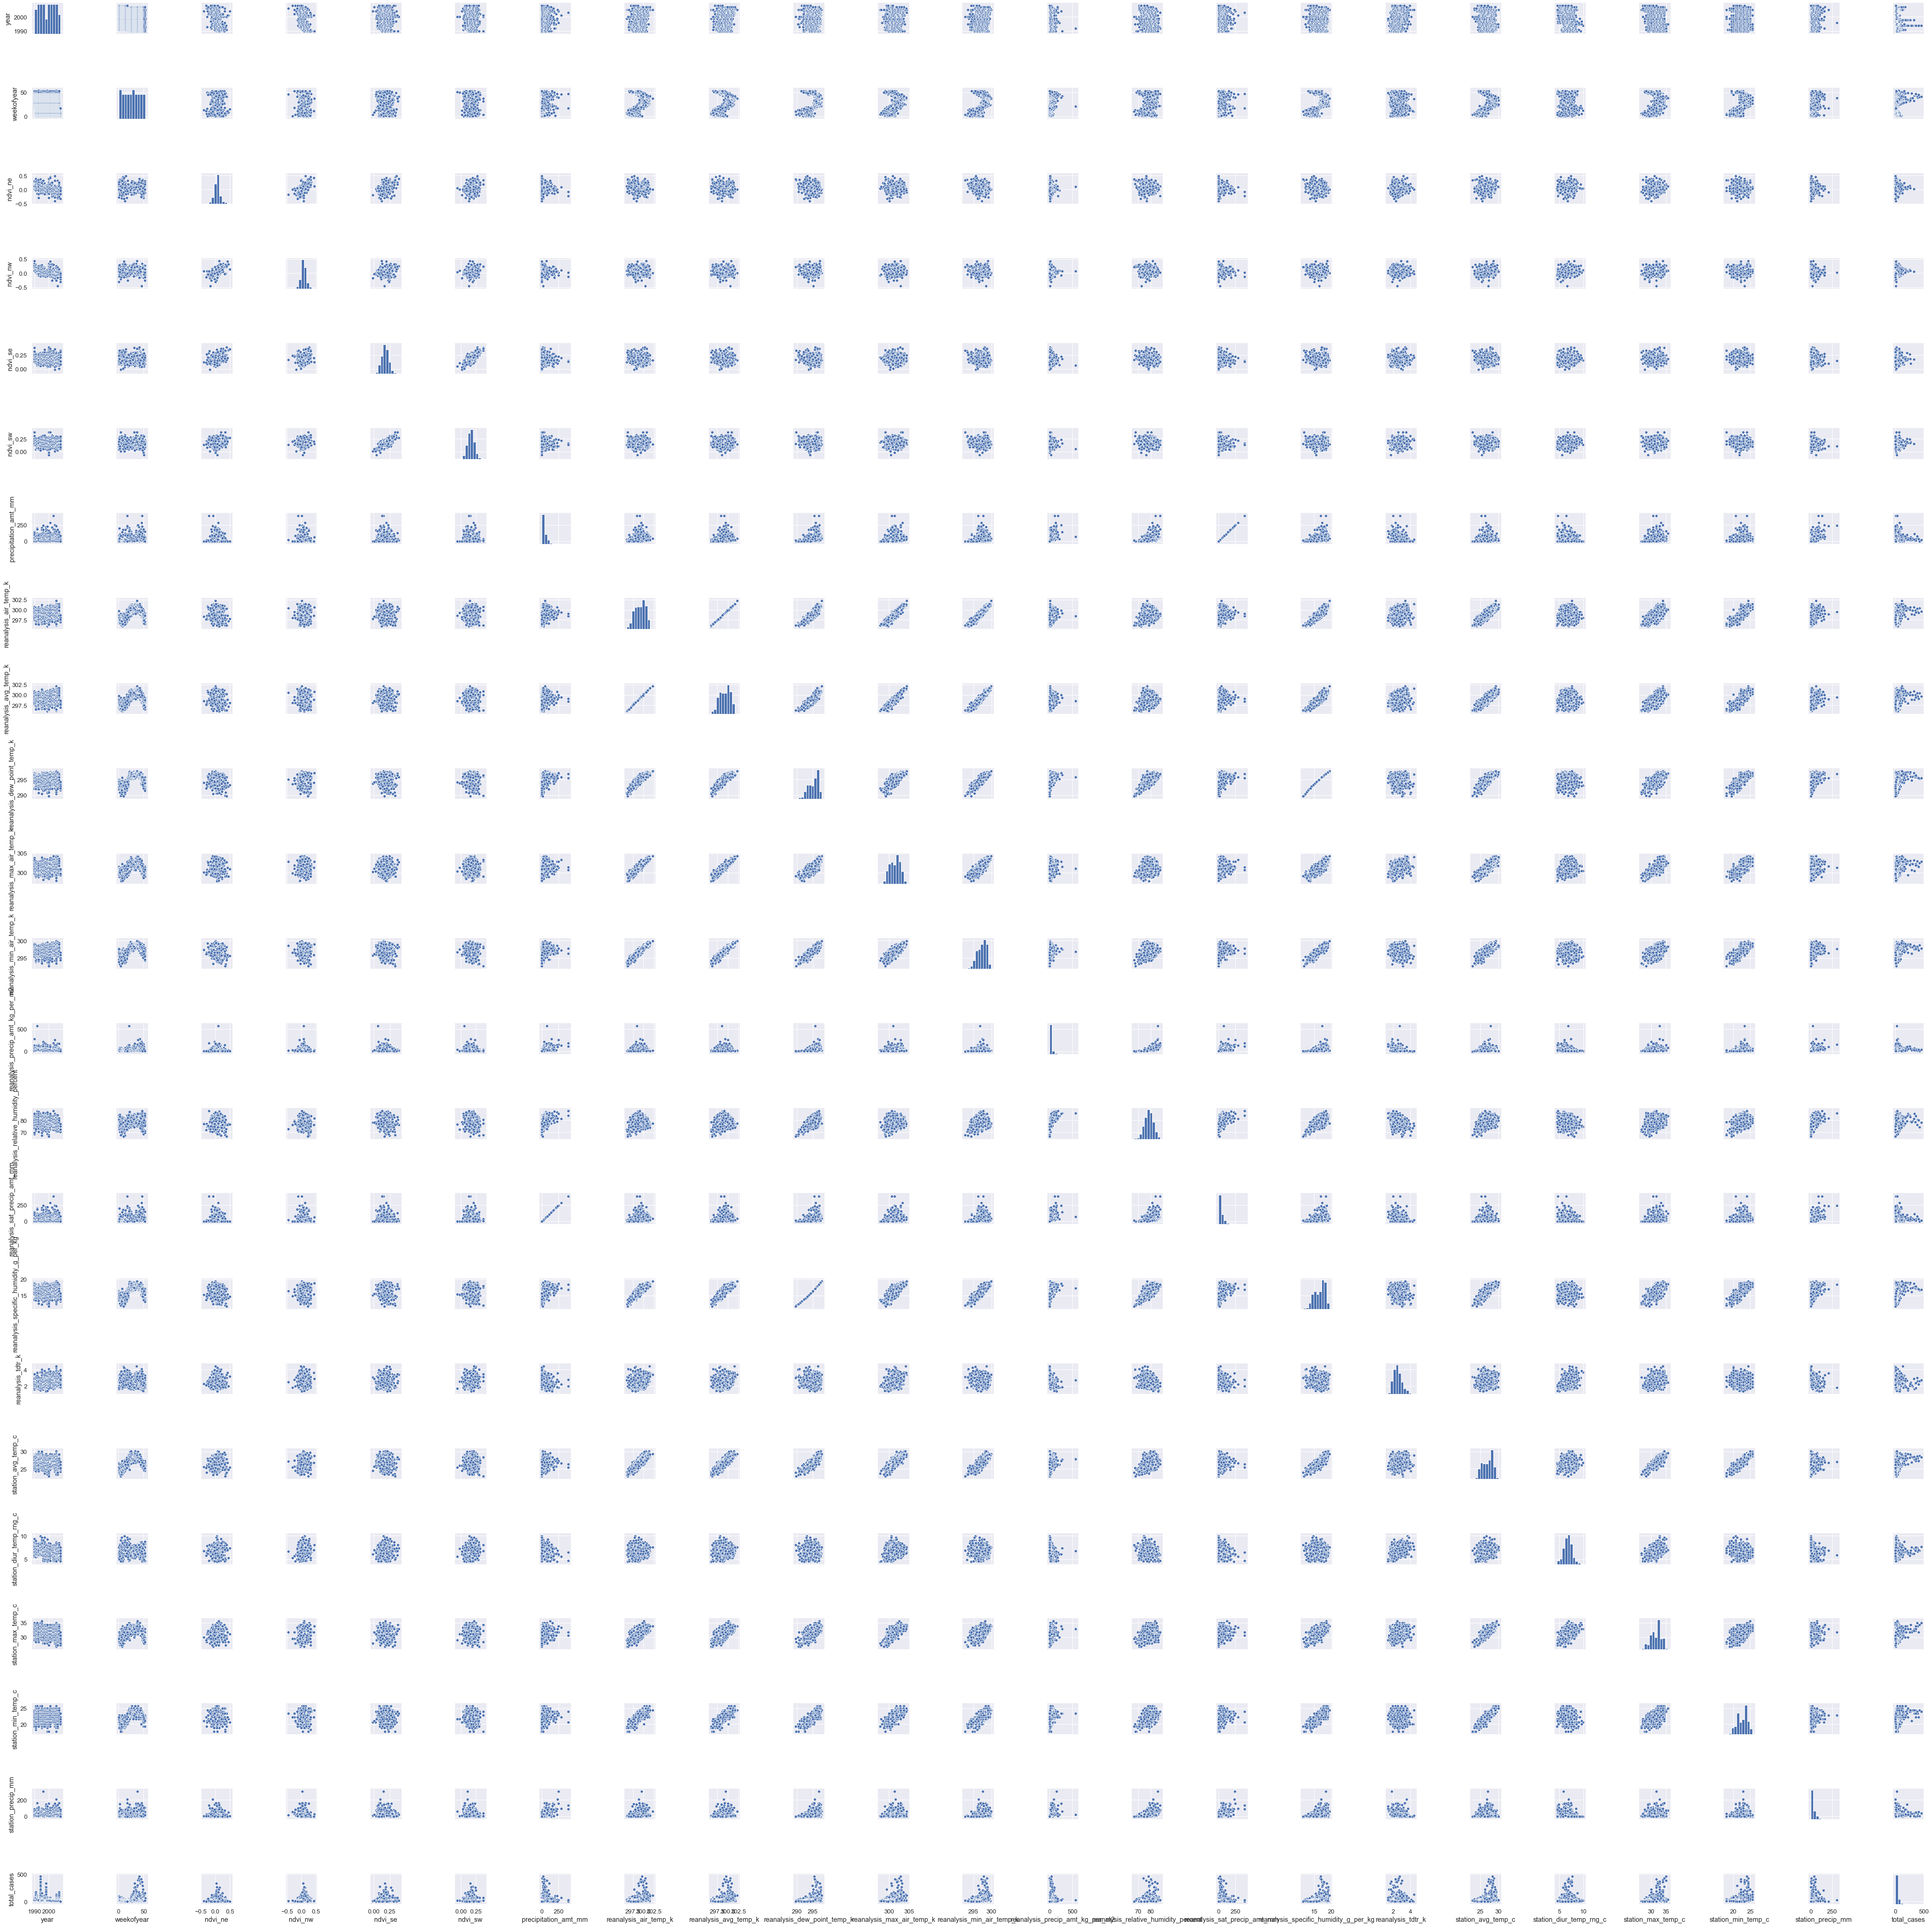

In [15]:
sns.pairplot(df)
plt.show()

Now we check any correlation between features:

In [16]:
df.corr()

year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.073143 -0.392312   
weekofyear                            -0.073143    1.000000 -0.020271   
ndvi_ne                               -0.392312   -0.020271  1.000000   
ndvi_nw                               -0.498367   -0.023549  0.673037   
ndvi_se                               -0.014863   -0.009380  0.234049   
ndvi_sw                               -0.077928   -0.075804  0.177792   
precipitation_amt_mm                   0.031612    0.231961 -0.048727   
reanalysis_air_temp_k                  0.185813    0.575381 -0.073170   
reanalysis_avg_temp_k                  0.189696    0.561001 -0.071176   
reanalysis_dew_point_temp_k            0.015428    0.578072 -0.040008   
reanalysis_max_air_temp_k              0.177772    0.519083 -0.044553   
reanalysis_min_air_temp_k              0.105355    0.574494 -0.096176   
reanalysis_precip_amt_kg_per_m2       -0.132494    0.253975  0.004448   
reanalysis_relative_humidity_percent  -0.286206    0.306771  0.039138   
reanalysis_sat_precip_amt_mm           0.031612    0.231961 -0.048727   
reanalysis_specific_humidity_g_per_kg  0.018129    0.585224 -0.035235   
reanalysis_tdtr_k                      0.325336   -0.099084 -0.009248   
station_avg_temp_c                    -0.097312    0.485038  0.064027   
station_diur_temp_rng_c               -0.276963   -0.137093  0.142875   
station_max_temp_c                    -0.172907    0.325748  0.092365   
station_min_temp_c                    -0.002097    0.520129  0.018818   
station_precip_mm                      0.082920    0.213336 -0.085993   
total_cases                           -0.212690    0.287134  0.037639   

                                        ndvi_nw   ndvi_se   ndvi_sw  \
year                                  -0.498367 -0.014863 -0.077928   
weekofyear                            -0.023549 -0.009380 -0.075804   
ndvi_ne                                0.673037  0.234049  0.177792   
ndvi_nw                                1.000000  0.196343  0.214615   
ndvi_se                                0.196343  1.000000  0.821354   
ndvi_sw                                0.214615  0.821354  1.000000   
precipitation_amt_mm                  -0.032351 -0.119386 -0.118752   
reanalysis_air_temp_k                 -0.077457 -0.014601 -0.043488   
reanalysis_avg_temp_k                 -0.076375 -0.011905 -0.035999   
reanalysis_dew_point_temp_k           -0.026070 -0.062773 -0.087787   
reanalysis_max_air_temp_k             -0.046189 -0.007382 -0.014890   
reanalysis_min_air_temp_k             -0.075337 -0.045946 -0.072345   
reanalysis_precip_amt_kg_per_m2        0.009383 -0.130848 -0.126646   
reanalysis_relative_humidity_percent   0.077339 -0.114294 -0.118769   
reanalysis_sat_precip_amt_mm          -0.032351 -0.119386 -0.118752   
reanalysis_specific_humidity_g_per_kg -0.020595 -0.058442 -0.080840   
reanalysis_tdtr_k                     -0.050657  0.029358  0.052465   
station_avg_temp_c                     0.087298 -0.056545 -0.041495   
station_diur_temp_rng_c                0.184124  0.018121  0.069843   
station_max_temp_c                     0.136659 -0.063718 -0.017866   
station_min_temp_c                     0.016428 -0.069275 -0.074045   
station_precip_mm                     -0.076237 -0.140286 -0.175239   
total_cases                            0.075307  0.001113 -0.000333   

                                       precipitation_amt_mm  \
year                                               0.031612   
weekofyear                                         0.231961   
ndvi_ne                                           -0.048727   
ndvi_nw                                           -0.032351   
ndvi_se                                           -0.119386   
ndvi_sw                                           -0.118752   
precipitation_amt_mm                               1.000000   
reanalysis_air_temp_k                              0.233912   
reanalysis_avg_tem

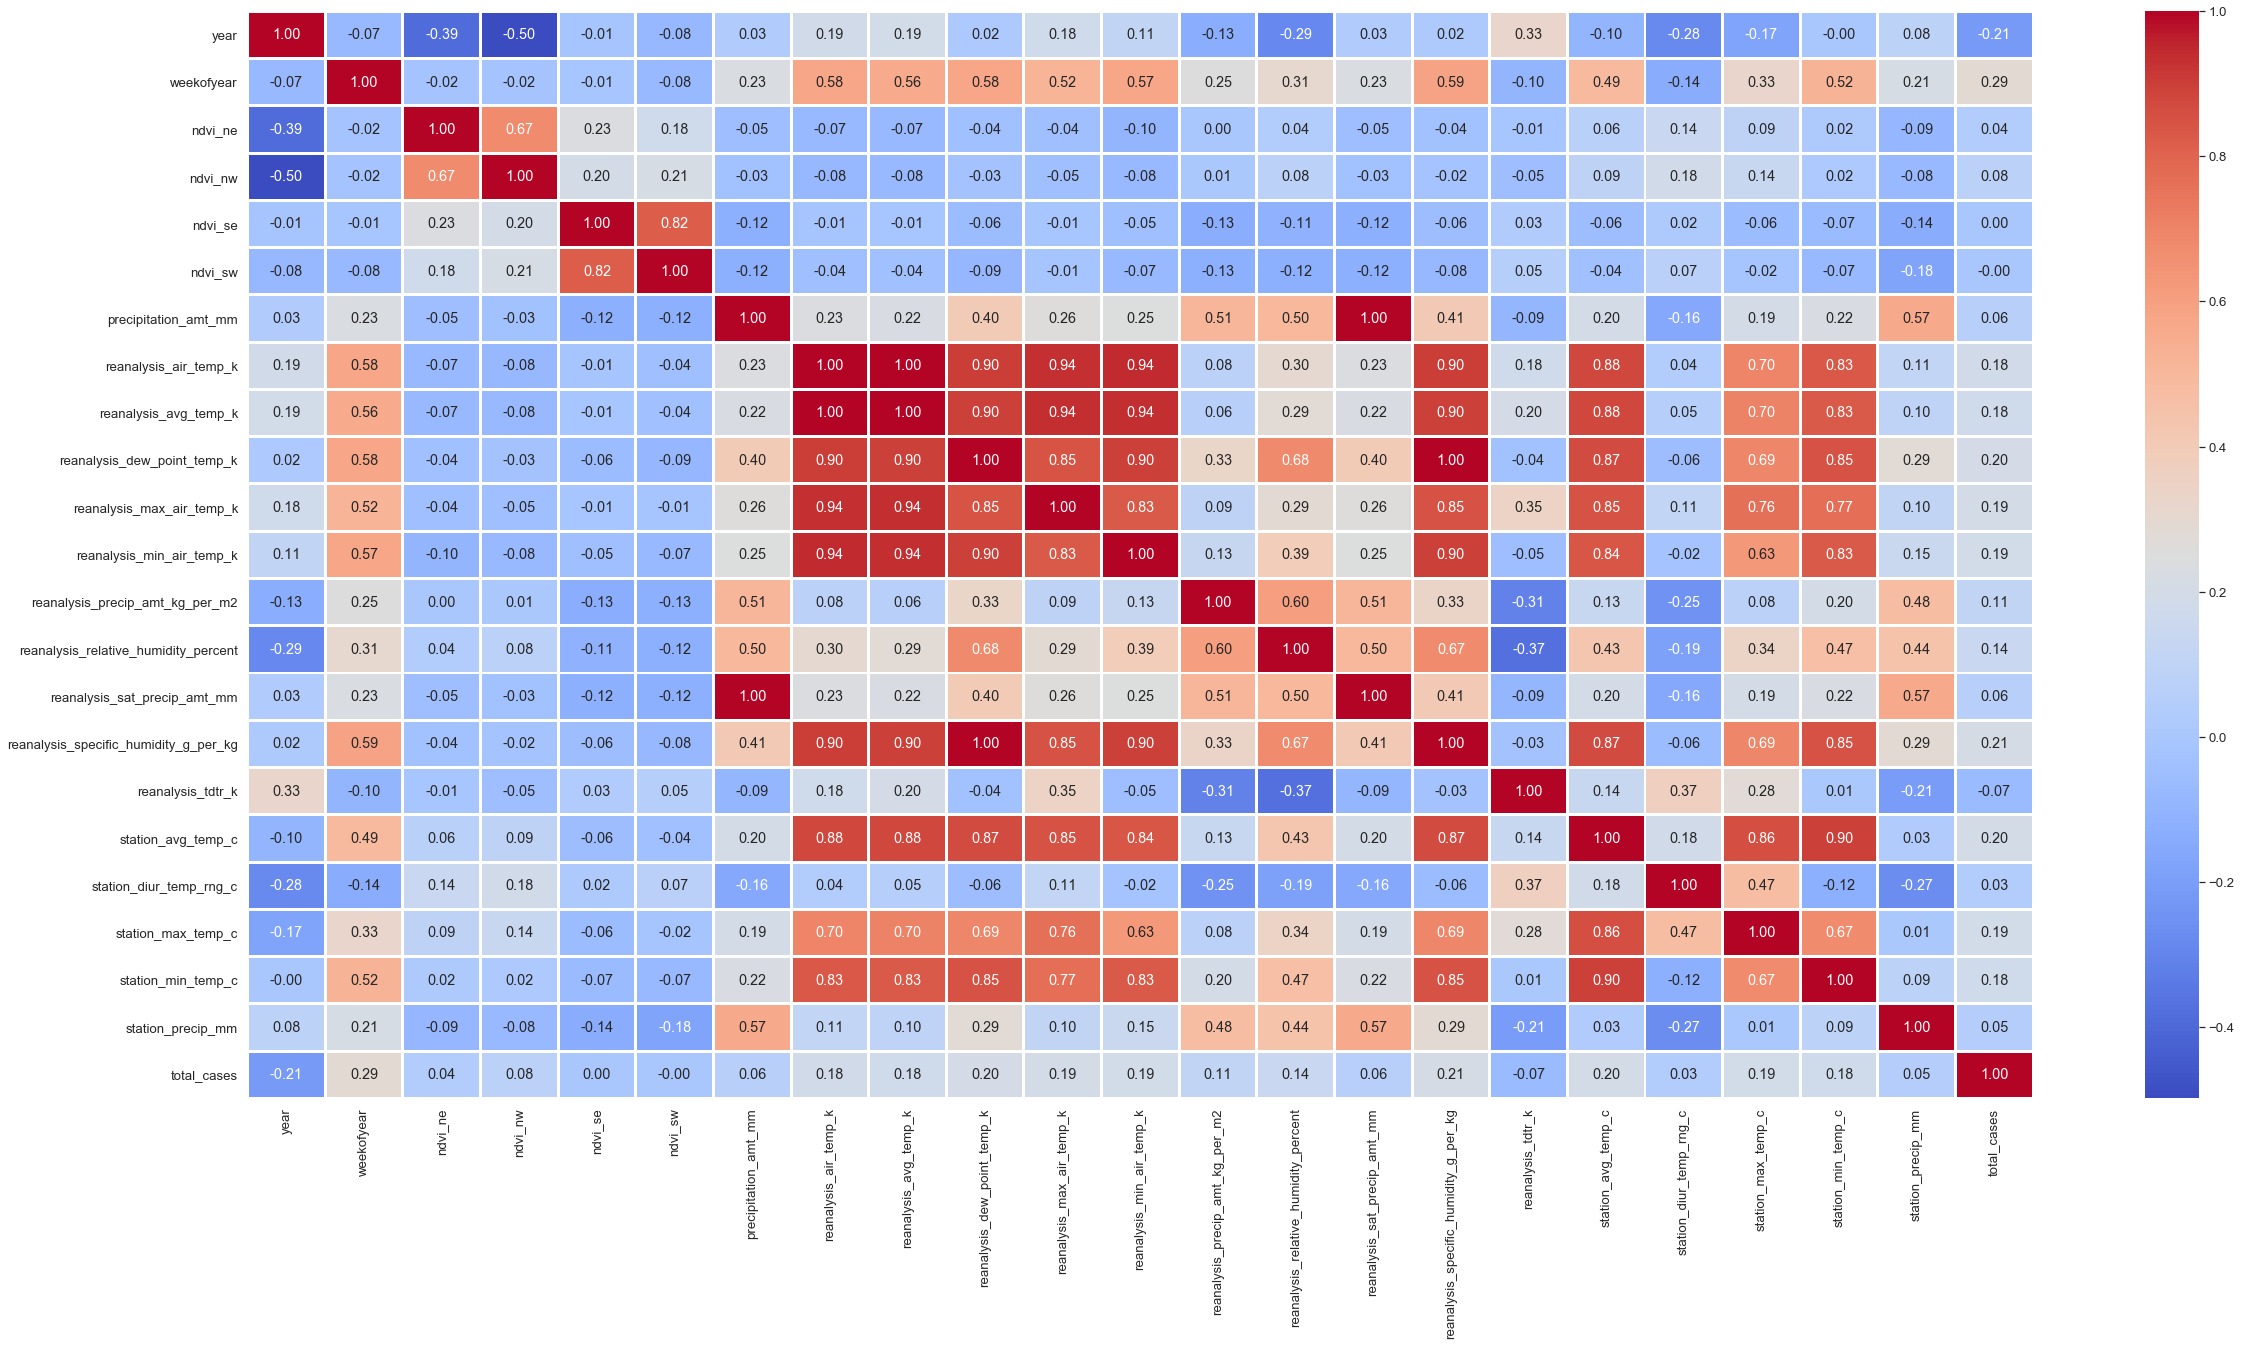

In [17]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

Several features are highly correlated with each other: 
- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid

- reanalysis_air_temp_k – Mean air temperature
- reanalysis_avg_temp_k – Average air temperature
- reanalysis_dew_point_temp_k – Mean dew point temperature
- reanalysis_max_air_temp_k – Maximum air temperature
- reanalysis_min_air_temp_k – Minimum air temperature
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity

- station_avg_temp_c – Average temperature
- station_max_temp_c – Maximum temperature
- station_min_temp_c – Minimum temperature

Data Preprocessing is next by checking missing values, preparing the data for modeling

### Drop unwanted features

In [18]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [19]:
df.drop(['city', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'],axis=1,inplace=True)

In [20]:
df

year  weekofyear  precipitation_amt_mm  reanalysis_air_temp_k  \
0    1990          18                 12.42             297.572857   
1    1990          19                 22.82             298.211429   
2    1990          20                 34.54             298.781429   
3    1990          21                 15.36             298.987143   
4    1990          22                  7.52             299.518571   
..    ...         ...                   ...                    ...   
931  2008          13                 27.19             296.958571   
932  2008          14                  3.82             298.081429   
933  2008          15                 16.96             297.460000   
934  2008          16                  0.00             297.630000   
935  2008          17                  0.00             298.672857   

     reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0               297.742857                   292.414286   
1               298.442857                   293.951429   
2               298.878571                   295.434286   
3               299.228571                   295.310000   
4               299.664286                   295.821429   
..                     ...                          ...   
931             296.957143                   292.095714   
932             298.228571                   293.235714   
933             297.564286                   292.732857   
934             297.778571                   292.274286   
935             298.692857                   294.280000   

     reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                        299.8                      295.9   
1                        300.9                      296.4   
2                        300.5                      297.3   
3                        301.4                      297.0   
4                        301.9                      297.5   
..                         ...                        ...   
931                      299.7                      294.4   
932                      299.8                      296.5   
933                      299.4                      295.8   
934                      299.7                      295.9   
935                      300.9                      295.9   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              32.00                             73.365714   
1                              17.94                             77.368571   
2                              26.10                             82.052857   
3                              13.90                             80.337143   
4                              12.20                             80.460000   
..                               ...                                   ...   
931                             7.55                             74.247143   
932                             3.67                             74.600000   
933                            35.00                             75.027143   
934                             4.82                             72.285714   
935                             2.17                             76.960000   

     reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                           12.42                              14.012857   
1                           22.82                              15.372857   
2                           34.54                              16.848571   
3                           15.36                              16.672857   
4                            7.52                              17.210000   
..                            ...                                    ...   
931                         27.19                              13.644286   
932                          3.82                              14.662857   
933                         16.96                              14.184286   
934                      

### Treat Missing Values

In [21]:
df.isnull().sum()

year                                     0
weekofyear                               0
precipitation_amt_mm                     9
reanalysis_air_temp_k                    6
reanalysis_avg_temp_k                    6
reanalysis_dew_point_temp_k              6
reanalysis_max_air_temp_k                6
reanalysis_min_air_temp_k                6
reanalysis_precip_amt_kg_per_m2          6
reanalysis_relative_humidity_percent     6
reanalysis_sat_precip_amt_mm             9
reanalysis_specific_humidity_g_per_kg    6
reanalysis_tdtr_k                        6
station_avg_temp_c                       6
station_diur_temp_rng_c                  6
station_max_temp_c                       6
station_min_temp_c                       6
station_precip_mm                        6
total_cases                              0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

year                                     0
weekofyear                               0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
dtype: int64

In [24]:
df

year  weekofyear  precipitation_amt_mm  reanalysis_air_temp_k  \
0    1990          18                 12.42             297.572857   
1    1990          19                 22.82             298.211429   
2    1990          20                 34.54             298.781429   
3    1990          21                 15.36             298.987143   
4    1990          22                  7.52             299.518571   
..    ...         ...                   ...                    ...   
931  2008          13                 27.19             296.958571   
932  2008          14                  3.82             298.081429   
933  2008          15                 16.96             297.460000   
934  2008          16                  0.00             297.630000   
935  2008          17                  0.00             298.672857   

     reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0               297.742857                   292.414286   
1               298.442857                   293.951429   
2               298.878571                   295.434286   
3               299.228571                   295.310000   
4               299.664286                   295.821429   
..                     ...                          ...   
931             296.957143                   292.095714   
932             298.228571                   293.235714   
933             297.564286                   292.732857   
934             297.778571                   292.274286   
935             298.692857                   294.280000   

     reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                        299.8                      295.9   
1                        300.9                      296.4   
2                        300.5                      297.3   
3                        301.4                      297.0   
4                        301.9                      297.5   
..                         ...                        ...   
931                      299.7                      294.4   
932                      299.8                      296.5   
933                      299.4                      295.8   
934                      299.7                      295.9   
935                      300.9                      295.9   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              32.00                             73.365714   
1                              17.94                             77.368571   
2                              26.10                             82.052857   
3                              13.90                             80.337143   
4                              12.20                             80.460000   
..                               ...                                   ...   
931                             7.55                             74.247143   
932                             3.67                             74.600000   
933                            35.00                             75.027143   
934                             4.82                             72.285714   
935                             2.17                             76.960000   

     reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                           12.42                              14.012857   
1                           22.82                              15.372857   
2                           34.54                              16.848571   
3                           15.36                              16.672857   
4                            7.52                              17.210000   
..                            ...                                    ...   
931                         27.19                              13.644286   
932                          3.82                              14.662857   
933                         16.96                              14.184286   
934                      

### Treat Duplicate Values

In [25]:
df.duplicated(keep='first').sum()

0

### Create and save processed dataset

In [26]:
df.to_csv("train.csv",index=False)

In [27]:
df = pd.read_csv("train.csv")

In [28]:
df

year  weekofyear  precipitation_amt_mm  reanalysis_air_temp_k  \
0    1990          18                 12.42             297.572857   
1    1990          19                 22.82             298.211429   
2    1990          20                 34.54             298.781429   
3    1990          21                 15.36             298.987143   
4    1990          22                  7.52             299.518571   
..    ...         ...                   ...                    ...   
922  2008          13                 27.19             296.958571   
923  2008          14                  3.82             298.081429   
924  2008          15                 16.96             297.460000   
925  2008          16                  0.00             297.630000   
926  2008          17                  0.00             298.672857   

     reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0               297.742857                   292.414286   
1               298.442857                   293.951429   
2               298.878571                   295.434286   
3               299.228571                   295.310000   
4               299.664286                   295.821429   
..                     ...                          ...   
922             296.957143                   292.095714   
923             298.228571                   293.235714   
924             297.564286                   292.732857   
925             297.778571                   292.274286   
926             298.692857                   294.280000   

     reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                        299.8                      295.9   
1                        300.9                      296.4   
2                        300.5                      297.3   
3                        301.4                      297.0   
4                        301.9                      297.5   
..                         ...                        ...   
922                      299.7                      294.4   
923                      299.8                      296.5   
924                      299.4                      295.8   
925                      299.7                      295.9   
926                      300.9                      295.9   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              32.00                             73.365714   
1                              17.94                             77.368571   
2                              26.10                             82.052857   
3                              13.90                             80.337143   
4                              12.20                             80.460000   
..                               ...                                   ...   
922                             7.55                             74.247143   
923                             3.67                             74.600000   
924                            35.00                             75.027143   
925                             4.82                             72.285714   
926                             2.17                             76.960000   

     reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                           12.42                              14.012857   
1                           22.82                              15.372857   
2                           34.54                              16.848571   
3                           15.36                              16.672857   
4                            7.52                              17.210000   
..                            ...                                    ...   
922                         27.19                              13.644286   
923                          3.82                              14.662857   
924                         16.96                              14.184286   
925                      

In [29]:
df.shape

(927, 19)

# Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

In [30]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]

In [31]:
X.values

array([[1.990e+03, 1.800e+01, 1.242e+01, ..., 2.940e+01, 2.000e+01,
        1.600e+01],
       [1.990e+03, 1.900e+01, 2.282e+01, ..., 3.170e+01, 2.220e+01,
        8.600e+00],
       [1.990e+03, 2.000e+01, 3.454e+01, ..., 3.220e+01, 2.280e+01,
        4.140e+01],
       ...,
       [2.008e+03, 1.500e+01, 1.696e+01, ..., 2.940e+01, 2.170e+01,
        3.070e+01],
       [2.008e+03, 1.600e+01, 0.000e+00, ..., 2.940e+01, 2.170e+01,
        1.120e+01],
       [2.008e+03, 1.700e+01, 0.000e+00, ..., 3.170e+01, 2.330e+01,
        3.000e-01]])

In [32]:
y.values

array([  4,   5,   4,   3,   6,   2,   4,   5,  10,   6,   8,   2,   6,
        17,  23,  13,  21,  28,  24,  20,  40,  27,  42,  33,  43,  37,
        57,  71,  44,  56,  53,  52,  47,  26,  27,  21,  21,  26,  34,
        37,  17,  19,  25,  18,  21,  17,  17,  16,  16,  15,  23,  16,
        17,  12,  17,  10,  15,  19,  21,  14,  18,  13,  14,  18,  23,
        25,  62,  60,  76,  66,  64,  68,  89,  92, 140, 116, 142, 129,
       140, 140, 127, 129, 169, 141, 108,  78,  70, 104,  90,  85,  55,
        53,  59,  40,  37,  29,  30,  30,  28,  23,  24,  29,  26,  23,
        20,  19,  20,  26,  29,  31,  28,  26,  32,  35,  33,  30,  52,
        59,  67,  65,  74,  70,  61,  53,  76,  61,  57,  44,  34,  47,
        60,  60,  53,  36,  31,  32,  28,  33,  33,  35,  22,  13,  13,
        21,  17,  11,   8,   8,   6,   6,   7,  12,  17,  10,  10,  18,
        19,  12,  22,  12,  21,  18,  16,  16,  22,  17,  25,  23,  12,
        25,  28,  27,  18,  23,  23,  29,  38,  36,  43,  46,  3

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=123)

In [34]:
X_train

array([[2.003e+03, 1.600e+01, 5.960e+00, ..., 3.170e+01, 2.280e+01,
        4.650e+01],
       [2.004e+03, 4.000e+00, 0.000e+00, ..., 2.780e+01, 2.060e+01,
        1.020e+01],
       [2.006e+03, 2.200e+01, 6.492e+01, ..., 3.390e+01, 2.440e+01,
        2.210e+01],
       ...,
       [1.997e+03, 4.100e+01, 7.029e+01, ..., 3.330e+01, 2.330e+01,
        4.440e+01],
       [1.997e+03, 2.400e+01, 0.000e+00, ..., 3.280e+01, 2.390e+01,
        3.000e-01],
       [2.000e+03, 1.400e+01, 7.230e+00, ..., 3.060e+01, 2.170e+01,
        1.330e+01]])

In [35]:
X_test

array([[1994.  ,   24.  ,   13.82, ...,   32.8 ,   24.4 ,    5.4 ],
       [1994.  ,    2.  ,    0.  , ...,   29.4 ,   21.1 ,   13.4 ],
       [1995.  ,   11.  ,   19.43, ...,   31.7 ,   21.1 ,   16.5 ],
       ...,
       [1994.  ,   43.  ,  111.52, ...,   32.8 ,   23.3 ,   39.2 ],
       [1998.  ,   45.  ,  121.65, ...,   31.1 ,   23.3 ,   81.5 ],
       [1991.  ,   25.  ,   44.25, ...,   33.9 ,   25.  ,    3.3 ]])

In [36]:
scaler =  StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
X_train_scaled

array([[ 0.80231276, -0.72416376, -0.65577875, ...,  0.02951017,
         0.13318496,  0.64414028],
       [ 0.99615487, -1.53159499, -0.78691389, ..., -2.30058362,
        -1.33382934, -0.56126667],
       [ 1.38383909, -0.32044814,  0.64149106, ...,  1.34392205,
         1.20010444, -0.16610572],
       ...,
       [-0.36073991,  0.95798466,  0.7596447 , ...,  0.98544608,
         0.4665973 ,  0.57440599],
       [-0.36073991, -0.18587626, -0.78691389, ...,  0.68671611,
         0.8666921 , -0.89001402],
       [ 0.22078643, -0.85873563, -0.62783552, ..., -0.62769577,
        -0.60032219, -0.45832558]])

In [39]:
X_test_scaled = scaler.transform(X_test)

In [40]:
X_test_scaled

array([[-0.94226624, -0.18587626, -0.48283878, ...,  0.68671611,
         1.20010444, -0.72065933],
       [-0.94226624, -1.66616687, -0.78691389, ..., -1.34464771,
        -1.000417  , -0.4550049 ],
       [-0.74842413, -1.06059344, -0.35940453, ...,  0.02951017,
        -1.000417  , -0.35206381],
       ...,
       [-0.94226624,  1.09255653,  1.66680946, ...,  0.68671611,
         0.4665973 ,  0.40173062],
       [-0.1668978 ,  1.2271284 ,  1.8896952 , ..., -0.3289658 ,
         0.4665973 ,  1.80637839],
       [-1.52379257, -0.11859033,  0.18669854, ...,  1.34392205,
         1.60019925, -0.79039361]])

In [41]:
y_train

array([  7,  10,   5,  12,  22,   2,  33,  15,  18,  48,   5,  31,  29,
        12,  12,  13,  33,  14,   6,   4,  17,   9,   7,  16,  63,  14,
         8, 149,  21,  40,  14,  11,  91,  22,  30,  13,  18,  16,  17,
        20, 426,  19,   4,  15,  29,  49,  55,  25,  26,  39,   6,  25,
        41,  26,   3,  56,   2,  37,  42,  17,  10,  19,  62, 112,   7,
         7,  45,  10,  44,  26,  11,  15,   3,  53,   7,  72,  19,   7,
        28,  43,  80,  18,   2,  14, 353,  25,   7,   2,  10,  22, 364,
         7,  11,  53,   6,   2,  55, 169,  23,   8,  30,  11,  16,  65,
        20,  47,  14,  37,  28,  99,  34,  33,  15,  70,  21,  12,  59,
         3, 220,   1,  17,  84,   4,  20,   7,  12,  16,  76,  68,   6,
        25,  24,  24, 170,  27,  26,  50,  16,  12,  23,  31,   2,   2,
        27,  17,  71,  28,   7,   5,   6,  21,  21,  74,  14,  44, 263,
        39, 127,   4, 106,  70,  60,  25,  42,  25,  21,  29,  20,  61,
        82,  15,   5,  49,  62,  36,  36, 108,  46,  18,  25,   

### Simple Linear Regression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lr.coef_

array([ -13.80623407,    8.99915311,   -1.36325657, -175.84478333,
        -32.74754264,  209.53405334,   20.4104613 ,    4.2651429 ,
          3.28183336, -123.699823  ,   -1.36325657,   54.25518557,
         -2.69328076,   -9.40856536,   -2.59603833,    4.96282398,
         -1.77749875,    0.39295523])

In [45]:
lr.intercept_

34.546558704402564

In [46]:
ypred_lr = lr.predict(X_test_scaled)

In [47]:
y_test[:10]

array([31, 26,  7,  5, 65,  3, 23,  1, 78,  4], dtype=int64)

In [48]:
ypred_lr[:10]

array([ 36.55828463,  17.31594432,  39.84648332,  36.74135096,
        42.85447406, -10.5994066 ,  10.5371052 ,  -0.2688629 ,
        66.21352125,  37.09086605])

### Linear Regression Model Evaluation

In [49]:
mse = mean_squared_error(y_test,ypred_lr)
mse

2296.1327558860244

In [50]:
rmse = np.sqrt(mse)
rmse

47.91797946372556

In [51]:
r2_score(y_test,ypred_lr)

0.11917629922609252

### Create Polynomial Features and Train Model

In [52]:
pf = PolynomialFeatures(degree=3, include_bias=False)

In [53]:
X_pf = pf.fit_transform(X)

In [54]:
X_pf

array([[1.9900000e+03, 1.8000000e+01, 1.2420000e+01, ..., 6.4000000e+03,
        5.1200000e+03, 4.0960000e+03],
       [1.9900000e+03, 1.9000000e+01, 2.2820000e+01, ..., 4.2384240e+03,
        1.6419120e+03, 6.3605600e+02],
       [1.9900000e+03, 2.0000000e+01, 3.4540000e+01, ..., 2.1521376e+04,
        3.9078288e+04, 7.0957944e+04],
       ...,
       [2.0080000e+03, 1.5000000e+01, 1.6960000e+01, ..., 1.4456323e+04,
        2.0452033e+04, 2.8934443e+04],
       [2.0080000e+03, 1.6000000e+01, 0.0000000e+00, ..., 5.2739680e+03,
        2.7220480e+03, 1.4049280e+03],
       [2.0080000e+03, 1.7000000e+01, 0.0000000e+00, ..., 1.6286700e+02,
        2.0970000e+00, 2.7000000e-02]])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y.values, test_size=0.2, random_state=123)

In [56]:
X_train

array([[2.00300000e+03, 1.60000000e+01, 5.96000000e+00, ...,
        2.41725600e+04, 4.92993000e+04, 1.00544625e+05],
       [2.00400000e+03, 4.00000000e+00, 0.00000000e+00, ...,
        4.32847200e+03, 2.14322400e+03, 1.06120800e+03],
       [2.00600000e+03, 2.20000000e+01, 6.49200000e+01, ...,
        1.31574560e+04, 1.19172040e+04, 1.07938610e+04],
       ...,
       [1.99700000e+03, 4.10000000e+01, 7.02900000e+01, ...,
        2.41043160e+04, 4.59326880e+04, 8.75283840e+04],
       [1.99700000e+03, 2.40000000e+01, 0.00000000e+00, ...,
        1.71363000e+02, 2.15100000e+00, 2.70000000e-02],
       [2.00000000e+03, 1.40000000e+01, 7.23000000e+00, ...,
        6.26283700e+03, 3.83851300e+03, 2.35263700e+03]])

In [57]:
X_test

array([[1.99400000e+03, 2.40000000e+01, 1.38200000e+01, ...,
        3.21494400e+03, 7.11504000e+02, 1.57464000e+02],
       [1.99400000e+03, 2.00000000e+00, 0.00000000e+00, ...,
        5.96581400e+03, 3.78871600e+03, 2.40610400e+03],
       [1.99500000e+03, 1.10000000e+01, 1.94300000e+01, ...,
        7.34596500e+03, 5.74447500e+03, 4.49212500e+03],
       ...,
       [1.99400000e+03, 4.30000000e+01, 1.11520000e+02, ...,
        2.12812880e+04, 3.58037120e+04, 6.02362880e+04],
       [1.99800000e+03, 4.50000000e+01, 1.21650000e+02, ...,
        4.42455350e+04, 1.54764425e+05, 5.41343375e+05],
       [1.99100000e+03, 2.50000000e+01, 4.42500000e+01, ...,
        2.06250000e+03, 2.72250000e+02, 3.59370000e+01]])

In [58]:
scaler =  StandardScaler()

In [59]:
X_train_scaled = scaler.fit_transform(X_train)

In [60]:
X_train_scaled

array([[ 0.80231276, -0.72416376, -0.65577875, ...,  0.645733  ,
         0.10888467, -0.05782687],
       [ 0.99615487, -1.53159499, -0.78691389, ..., -0.62078406,
        -0.31891229, -0.14300692],
       [ 1.38383909, -0.32044814,  0.64149106, ..., -0.05728833,
        -0.23024335, -0.1346736 ],
       ...,
       [-0.36073991,  0.95798466,  0.7596447 , ...,  0.64137743,
         0.07834298, -0.06897168],
       [-0.36073991, -0.18587626, -0.78691389, ..., -0.88610487,
        -0.33833597, -0.14391553],
       [ 0.22078643, -0.85873563, -0.62783552, ..., -0.49732632,
        -0.30353273, -0.14190117]])

In [61]:
X_test_scaled = scaler.transform(X_test)

In [62]:
X_test_scaled

array([[-0.94226624, -0.18587626, -0.48283878, ..., -0.6918532 ,
        -0.33190076, -0.14378073],
       [-0.94226624, -1.66616687, -0.78691389, ..., -0.51628334,
        -0.30398449, -0.14185539],
       [-0.74842413, -1.06059344, -0.35940453, ..., -0.42819742,
        -0.28624196, -0.14006929],
       ...,
       [-0.94226624,  1.09255653,  1.66680946, ...,  0.4612022 ,
        -0.01354646, -0.09233982],
       [-0.1668978 ,  1.2271284 ,  1.8896952 , ...,  1.9268584 ,
         1.06565765,  0.31959546],
       [-1.52379257, -0.11859033,  0.18669854, ..., -0.76540609,
        -0.33588564, -0.14388478]])

In [63]:
y_train

array([  7,  10,   5,  12,  22,   2,  33,  15,  18,  48,   5,  31,  29,
        12,  12,  13,  33,  14,   6,   4,  17,   9,   7,  16,  63,  14,
         8, 149,  21,  40,  14,  11,  91,  22,  30,  13,  18,  16,  17,
        20, 426,  19,   4,  15,  29,  49,  55,  25,  26,  39,   6,  25,
        41,  26,   3,  56,   2,  37,  42,  17,  10,  19,  62, 112,   7,
         7,  45,  10,  44,  26,  11,  15,   3,  53,   7,  72,  19,   7,
        28,  43,  80,  18,   2,  14, 353,  25,   7,   2,  10,  22, 364,
         7,  11,  53,   6,   2,  55, 169,  23,   8,  30,  11,  16,  65,
        20,  47,  14,  37,  28,  99,  34,  33,  15,  70,  21,  12,  59,
         3, 220,   1,  17,  84,   4,  20,   7,  12,  16,  76,  68,   6,
        25,  24,  24, 170,  27,  26,  50,  16,  12,  23,  31,   2,   2,
        27,  17,  71,  28,   7,   5,   6,  21,  21,  74,  14,  44, 263,
        39, 127,   4, 106,  70,  60,  25,  42,  25,  21,  29,  20,  61,
        82,  15,   5,  49,  62,  36,  36, 108,  46,  18,  25,   

### Simple Linear Regression (Polynomial)

In [64]:
lrpf = LinearRegression()

In [65]:
lrpf.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lrpf.coef_

array([ 4.04497778e+05, -2.55668313e+05,  6.50974813e+04, ...,
       -4.21015756e+03,  5.73243989e+03, -5.20813936e+00])

In [67]:
lrpf.intercept_

34.54655886532953

In [68]:
ypred_lrpf = lrpf.predict(X_test_scaled)

In [69]:
y_test[:10]

array([31, 26,  7,  5, 65,  3, 23,  1, 78,  4], dtype=int64)

In [70]:
ypred_lrpf[:10]

array([  27.22557408, -221.18226368, -149.19290461, 1216.07131533,
         14.47456172,   58.55744448,  -39.79681531, -110.82577654,
        111.5734072 ,  -18.22927902])

### Linear Regression Model Evaluation for Polynomial

In [71]:
mse = mean_squared_error(y_test,ypred_lrpf)
mse

592089.1907837309

In [72]:
rmse = np.sqrt(mse)
rmse

769.4733203846192

In [73]:
r2_score(y_test,ypred_lrpf)

-226.13242118838605

### Ridge Regression

In [74]:
# Reload the original df again
df

year  weekofyear  precipitation_amt_mm  reanalysis_air_temp_k  \
0    1990          18                 12.42             297.572857   
1    1990          19                 22.82             298.211429   
2    1990          20                 34.54             298.781429   
3    1990          21                 15.36             298.987143   
4    1990          22                  7.52             299.518571   
..    ...         ...                   ...                    ...   
922  2008          13                 27.19             296.958571   
923  2008          14                  3.82             298.081429   
924  2008          15                 16.96             297.460000   
925  2008          16                  0.00             297.630000   
926  2008          17                  0.00             298.672857   

     reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0               297.742857                   292.414286   
1               298.442857                   293.951429   
2               298.878571                   295.434286   
3               299.228571                   295.310000   
4               299.664286                   295.821429   
..                     ...                          ...   
922             296.957143                   292.095714   
923             298.228571                   293.235714   
924             297.564286                   292.732857   
925             297.778571                   292.274286   
926             298.692857                   294.280000   

     reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                        299.8                      295.9   
1                        300.9                      296.4   
2                        300.5                      297.3   
3                        301.4                      297.0   
4                        301.9                      297.5   
..                         ...                        ...   
922                      299.7                      294.4   
923                      299.8                      296.5   
924                      299.4                      295.8   
925                      299.7                      295.9   
926                      300.9                      295.9   

     reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                              32.00                             73.365714   
1                              17.94                             77.368571   
2                              26.10                             82.052857   
3                              13.90                             80.337143   
4                              12.20                             80.460000   
..                               ...                                   ...   
922                             7.55                             74.247143   
923                             3.67                             74.600000   
924                            35.00                             75.027143   
925                             4.82                             72.285714   
926                             2.17                             76.960000   

     reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                           12.42                              14.012857   
1                           22.82                              15.372857   
2                           34.54                              16.848571   
3                           15.36                              16.672857   
4                            7.52                              17.210000   
..                            ...                                    ...   
922                         27.19                              13.644286   
923                          3.82                              14.662857   
924                         16.96                              14.184286   
925                      

In [75]:
X = df.iloc[:,0:18]
y = df.iloc[:,18]

In [76]:
X.values

array([[1.990e+03, 1.800e+01, 1.242e+01, ..., 2.940e+01, 2.000e+01,
        1.600e+01],
       [1.990e+03, 1.900e+01, 2.282e+01, ..., 3.170e+01, 2.220e+01,
        8.600e+00],
       [1.990e+03, 2.000e+01, 3.454e+01, ..., 3.220e+01, 2.280e+01,
        4.140e+01],
       ...,
       [2.008e+03, 1.500e+01, 1.696e+01, ..., 2.940e+01, 2.170e+01,
        3.070e+01],
       [2.008e+03, 1.600e+01, 0.000e+00, ..., 2.940e+01, 2.170e+01,
        1.120e+01],
       [2.008e+03, 1.700e+01, 0.000e+00, ..., 3.170e+01, 2.330e+01,
        3.000e-01]])

In [77]:
y.values

array([  4,   5,   4,   3,   6,   2,   4,   5,  10,   6,   8,   2,   6,
        17,  23,  13,  21,  28,  24,  20,  40,  27,  42,  33,  43,  37,
        57,  71,  44,  56,  53,  52,  47,  26,  27,  21,  21,  26,  34,
        37,  17,  19,  25,  18,  21,  17,  17,  16,  16,  15,  23,  16,
        17,  12,  17,  10,  15,  19,  21,  14,  18,  13,  14,  18,  23,
        25,  62,  60,  76,  66,  64,  68,  89,  92, 140, 116, 142, 129,
       140, 140, 127, 129, 169, 141, 108,  78,  70, 104,  90,  85,  55,
        53,  59,  40,  37,  29,  30,  30,  28,  23,  24,  29,  26,  23,
        20,  19,  20,  26,  29,  31,  28,  26,  32,  35,  33,  30,  52,
        59,  67,  65,  74,  70,  61,  53,  76,  61,  57,  44,  34,  47,
        60,  60,  53,  36,  31,  32,  28,  33,  33,  35,  22,  13,  13,
        21,  17,  11,   8,   8,   6,   6,   7,  12,  17,  10,  10,  18,
        19,  12,  22,  12,  21,  18,  16,  16,  22,  17,  25,  23,  12,
        25,  28,  27,  18,  23,  23,  29,  38,  36,  43,  46,  3

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=123)

In [79]:
X_train

array([[2.003e+03, 1.600e+01, 5.960e+00, ..., 3.170e+01, 2.280e+01,
        4.650e+01],
       [2.004e+03, 4.000e+00, 0.000e+00, ..., 2.780e+01, 2.060e+01,
        1.020e+01],
       [2.006e+03, 2.200e+01, 6.492e+01, ..., 3.390e+01, 2.440e+01,
        2.210e+01],
       ...,
       [1.997e+03, 4.100e+01, 7.029e+01, ..., 3.330e+01, 2.330e+01,
        4.440e+01],
       [1.997e+03, 2.400e+01, 0.000e+00, ..., 3.280e+01, 2.390e+01,
        3.000e-01],
       [2.000e+03, 1.400e+01, 7.230e+00, ..., 3.060e+01, 2.170e+01,
        1.330e+01]])

In [80]:
X_test

array([[1994.  ,   24.  ,   13.82, ...,   32.8 ,   24.4 ,    5.4 ],
       [1994.  ,    2.  ,    0.  , ...,   29.4 ,   21.1 ,   13.4 ],
       [1995.  ,   11.  ,   19.43, ...,   31.7 ,   21.1 ,   16.5 ],
       ...,
       [1994.  ,   43.  ,  111.52, ...,   32.8 ,   23.3 ,   39.2 ],
       [1998.  ,   45.  ,  121.65, ...,   31.1 ,   23.3 ,   81.5 ],
       [1991.  ,   25.  ,   44.25, ...,   33.9 ,   25.  ,    3.3 ]])

In [81]:
scaler =  StandardScaler()

In [82]:
X_train_scaled = scaler.fit_transform(X_train)

In [83]:
X_train_scaled

array([[ 0.80231276, -0.72416376, -0.65577875, ...,  0.02951017,
         0.13318496,  0.64414028],
       [ 0.99615487, -1.53159499, -0.78691389, ..., -2.30058362,
        -1.33382934, -0.56126667],
       [ 1.38383909, -0.32044814,  0.64149106, ...,  1.34392205,
         1.20010444, -0.16610572],
       ...,
       [-0.36073991,  0.95798466,  0.7596447 , ...,  0.98544608,
         0.4665973 ,  0.57440599],
       [-0.36073991, -0.18587626, -0.78691389, ...,  0.68671611,
         0.8666921 , -0.89001402],
       [ 0.22078643, -0.85873563, -0.62783552, ..., -0.62769577,
        -0.60032219, -0.45832558]])

In [84]:
X_test_scaled = scaler.transform(X_test)

In [85]:
X_test_scaled

array([[-0.94226624, -0.18587626, -0.48283878, ...,  0.68671611,
         1.20010444, -0.72065933],
       [-0.94226624, -1.66616687, -0.78691389, ..., -1.34464771,
        -1.000417  , -0.4550049 ],
       [-0.74842413, -1.06059344, -0.35940453, ...,  0.02951017,
        -1.000417  , -0.35206381],
       ...,
       [-0.94226624,  1.09255653,  1.66680946, ...,  0.68671611,
         0.4665973 ,  0.40173062],
       [-0.1668978 ,  1.2271284 ,  1.8896952 , ..., -0.3289658 ,
         0.4665973 ,  1.80637839],
       [-1.52379257, -0.11859033,  0.18669854, ...,  1.34392205,
         1.60019925, -0.79039361]])

In [86]:
y_train

array([  7,  10,   5,  12,  22,   2,  33,  15,  18,  48,   5,  31,  29,
        12,  12,  13,  33,  14,   6,   4,  17,   9,   7,  16,  63,  14,
         8, 149,  21,  40,  14,  11,  91,  22,  30,  13,  18,  16,  17,
        20, 426,  19,   4,  15,  29,  49,  55,  25,  26,  39,   6,  25,
        41,  26,   3,  56,   2,  37,  42,  17,  10,  19,  62, 112,   7,
         7,  45,  10,  44,  26,  11,  15,   3,  53,   7,  72,  19,   7,
        28,  43,  80,  18,   2,  14, 353,  25,   7,   2,  10,  22, 364,
         7,  11,  53,   6,   2,  55, 169,  23,   8,  30,  11,  16,  65,
        20,  47,  14,  37,  28,  99,  34,  33,  15,  70,  21,  12,  59,
         3, 220,   1,  17,  84,   4,  20,   7,  12,  16,  76,  68,   6,
        25,  24,  24, 170,  27,  26,  50,  16,  12,  23,  31,   2,   2,
        27,  17,  71,  28,   7,   5,   6,  21,  21,  74,  14,  44, 263,
        39, 127,   4, 106,  70,  60,  25,  42,  25,  21,  29,  20,  61,
        82,  15,   5,  49,  62,  36,  36, 108,  46,  18,  25,   

In [87]:
lridge = Ridge(alpha=0.5, random_state=123)

In [88]:
lridge.fit(X_train_scaled,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)

In [89]:
ypredridge = lridge.predict(X_test_scaled)

In [90]:
y_test[:10]

array([31, 26,  7,  5, 65,  3, 23,  1, 78,  4], dtype=int64)

In [91]:
ypredridge[:10]

array([ 37.53806353,  15.61312738,  34.18539669,  38.36735229,
        44.22282347, -11.3641019 ,   7.71916815,  -2.86776714,
        65.20835978,  38.32572186])

### Ridge Regression Model Evaluation

In [92]:
mse = mean_squared_error(y_test,ypredridge)
mse

2265.173998629175

In [93]:
rmse = np.sqrt(mse)
rmse

47.59384412536116

In [94]:
r2_score(y_test,ypredridge)

0.13105244491864254

### Lasso Regression

In [95]:
llasso = Lasso(alpha=0.5, random_state=123)

In [96]:
llasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
ypredlasso = llasso.predict(X_test_scaled)

In [98]:
y_test[:10]

array([31, 26,  7,  5, 65,  3, 23,  1, 78,  4], dtype=int64)

In [99]:
ypredlasso[:10]

array([41.40689525, 18.37196846, 23.46610452, 43.91767065, 45.51813448,
       -9.97304095,  8.67772412, -3.65533923, 59.60398402, 40.92403884])

### Lasso Regression Model Evaluation

In [100]:
mse = mean_squared_error(y_test,ypredlasso)
mse

2279.791001571065

In [101]:
rmse = np.sqrt(mse)
rmse

47.74715699987869

In [102]:
r2_score(y_test,ypredlasso)

0.1254451895922707

# A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

Ridge Regression gives us the best score for lowest RMSE and highest R2 score.

# Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

Based on the dataset provided, we found that Linear Regression model not suitable due to low R2 scores. Even with regularization, it only improves the model a bit.

We need to do extra research to find out what really causes dengue fever in San Jose. The environment and climate data is inadequate to explain dengue cases.

# Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

We need to find out any other features beyond the current dataset provides as the prediction was not satisfactory.

We also need to explore other models like tree, support vector machine, random forest regressors model to see if they can able to analyse the data patterns to give better predictions.